# Assignment 9 - EDA on the State of Happiness

## Background

The World Happiness Report (https://worldhappiness.report/) has conducted numerous surveys to quantify and to find the state of happiness in the world. The World Happiness Report partially uses the data of Gallup World Poll for its rankings among countries. In thier studies and surveys of the World Happiness Report, 158 countries have participated. In our project, we will focus on the status of the world happiness for 5 consecutive years 2015-2019. Among the so many considered parameters in WHR, we will only focus on a small subset of the most infuential parameters, namely

1. GDP per Capita
2. Health
3. Freedom
4. Generosity
5. Corruption

We will look for correlations between the Happiness Score and the above parameters.

## Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the csv Source Files

In [2]:
path='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_20'

In [3]:
Happy=[];
for i in range(5):
    str_path = path + '{}.csv'.format(i+15)
    Happy.append(pd.read_csv(str_path))

## Data Cleansing

In [4]:
# We first compare the titles of the columns of all 5 files. It is realized that although some columns represent 
# the same content (e.g. 'Economy (GDP per Capita)', 'GDP per capita', and 'Economy..GDP.per.Capita.'), the titles
# are different! 

for k in range(len(Happy)):
    print(Happy[k].columns.tolist(), end =" \n")

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expec

In [5]:
# We get rid of all the blank spaces and dots (i.e. ' ' and '.') in the titles of columns at once.

for k in range(len(Happy)):
    Happy[k].columns=Happy[k].rename(columns= lambda x: x.replace(" ", "_")).columns.tolist()
    Happy[k].columns=Happy[k].rename(columns= lambda x: x.replace(".", "_")).columns.tolist()

In [6]:
# We choose uniform titles for all equivalent columns of the 5 files.

for k in range(3):
    Happy[k]=Happy[k].rename(columns={'Economy_(GDP_per_Capita)':'GDP_per_capita',
                                  'Trust_(Government_Corruption)':'Corruption',
                                  'Health_(Life_Expectancy)':'Health','Economy__GDP_per_Capita_':'GDP_per_capita',
                                 'Trust__Government_Corruption_':'Corruption','Health__Life_Expectancy_':'Health'})
    
for k in range(3,5):
    Happy[k]=Happy[k].rename(columns={'Score':'Happiness_Score','Overall_rank':'Happiness_Rank',
                                  'Country_or_region':'Country','Freedom_to_make_life_choices':'Freedom',
                                  'Perceptions_of_corruption':'Corruption','Healthy_life_expectancy':'Health'})

In [7]:
# We now find the columns with common titles in all 5 dataframes.

Common_titles=set(Happy[0].columns.tolist())
for k in range(len(Happy)):
    Common_titles=Common_titles & set(Happy[k].columns.tolist())

common_titles = list(Common_titles)
common_titles

['GDP_per_capita',
 'Happiness_Score',
 'Corruption',
 'Freedom',
 'Health',
 'Generosity',
 'Country',
 'Happiness_Rank']

In [8]:
# We add a year column to each of the data frames, and filter them with only the common columns. Finally, we 
# concatenate all them into one single dataframe 'Happiness_df'.

Happiness_df=pd.DataFrame();
aux_df=[];

for i in range(len(Happy)):
    df = Happy[i].filter(common_titles, axis=1)
    df['Year']=2015+i
    aux_df.append(df)
    
Happiness_df = pd.concat(aux_df)

Happiness_df.shape  # number of rows and columns of the final dataframe Happiness_df

(782, 9)

In [9]:
# Checking for missing values

Happiness_df[Happiness_df.isnull().any(axis=1)]

,GDP_per_capita,Happiness_Score,Corruption,Freedom,Health,Generosity,Country,Happiness_Rank,Year
19,2.096,6.774,NaN,0.284,0.67,0.186,United Arab Emirates,20,2018


In [10]:
# Finding the value of corruption in United Arab Emirates for the previous year (2017)

Happiness_df.loc[(Happiness_df['Country']=='United Arab Emirates') & (Happiness_df['Year']==2017)]

,GDP_per_capita,Happiness_Score,Corruption,Freedom,Health,Generosity,Country,Happiness_Rank,Year
20,1.626343,6.648,0.32449,0.608345,0.726798,0.360942,United Arab Emirates,21,2017


In [11]:
# Replacing the missing value by its previous year value

Happiness_df.fillna(0.32449, inplace=True)

In [12]:
# Making sure that there is no missing value again

Happiness_df[Happiness_df.isnull().any(axis=1)]

,GDP_per_capita,Happiness_Score,Corruption,Freedom,Health,Generosity,Country,Happiness_Rank,Year


In [13]:
# Resetting the index of the dataframe so that every row would have a unique index

Happiness_df.reset_index(drop=True, inplace=True)

In [14]:
# Representing 5 sample rows of Happiness_df

Happiness_df.sample(5)

,GDP_per_capita,Happiness_Score,Corruption,Freedom,Health,Generosity,Country,Happiness_Rank,Year
740,0.33100,4.587,0.11300,0.25500,0.38000,0.17700,Burkina Faso,115,2019
250,1.12268,5.129,0.03061,0.26228,0.76171,0.23693,Lebanon,93,2016
107,0.59867,4.715,0.12905,0.24499,0.66015,0.11251,Palestinian Territories,108,2015
718,1.02900,5.191,0.10000,0.52100,0.89300,0.05800,China,93,2019
100,0.71206,4.867,0.03060,0.30658,0.07566,0.18259,Swaziland,101,2015


In [30]:
# Describing the statistical characteristics of Happiness_df

Happiness_df.describe()

,Generosity,GDP_per_capita,Happiness_Score,Happiness_Rank,Health,Freedom,Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.218576,0.916047,5.379018,78.698210,0.612416,0.411091,0.125690,2016.993606
std,0.122321,0.407340,1.127456,45.182384,0.248309,0.152880,0.105988,1.417364
min,0.000000,0.000000,2.693000,1.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.130000,0.606500,4.509750,40.000000,0.440183,0.309768,0.054250,2016.000000
50%,0.201982,0.982205,5.322000,79.000000,0.647310,0.431000,0.091033,2017.000000
75%,0.278832,1.236187,6.189500,118.000000,0.808000,0.531000,0.156243,2018.000000
max,0.838075,2.096000,7.769000,158.000000,1.141000,0.724000,0.551910,2019.000000


## Data Exploration

### Happiest Countries (2015-2019)

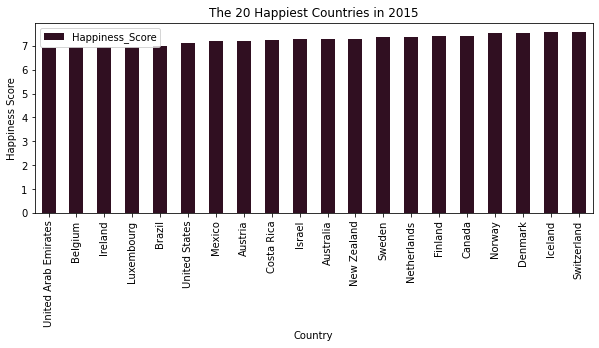

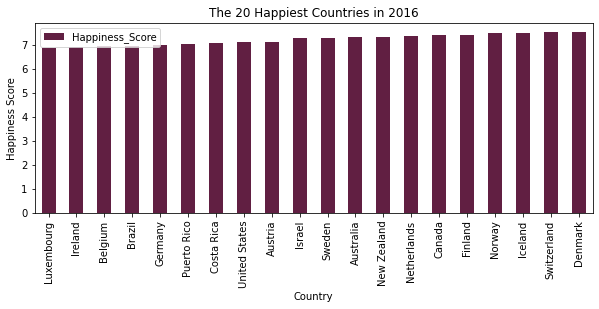

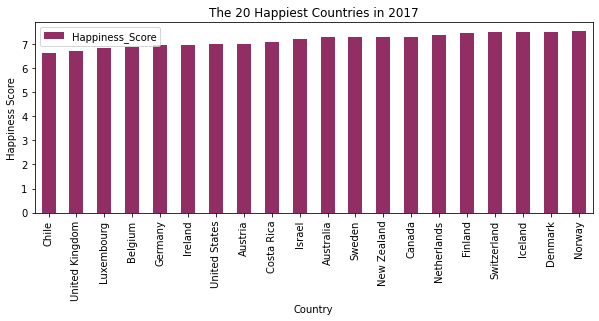

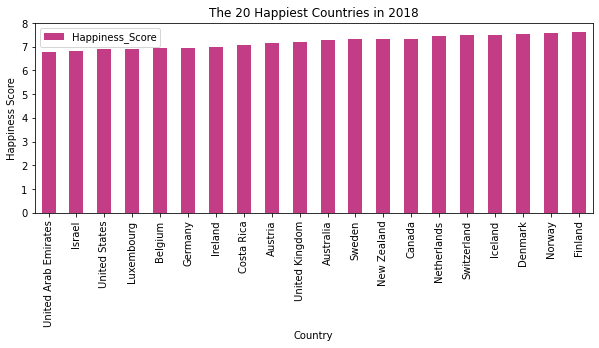

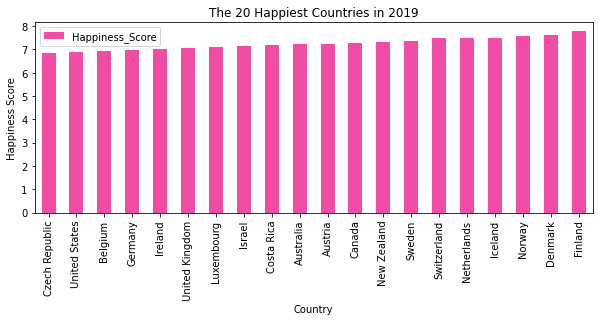

In [38]:
# Countires with 20 highest Happiness_Score index

for i in range(5):
    aux_df = Happiness_df[Happiness_df.Year == 2015+i].nlargest(20,'Happiness_Score').sort_values(by=
    ['Happiness_Score'])
    aux_df.plot.bar('Country','Happiness_Score',figsize=(10,3.5),title='The 20 Happiest Countries in 201{}'
                    .format(5+i),color=((i+1)*0.19,(i+1)*0.06,(i+1)*0.13))
    plt.ylabel('Happiness Score')

### Least Happiest Countries (2015-2019)

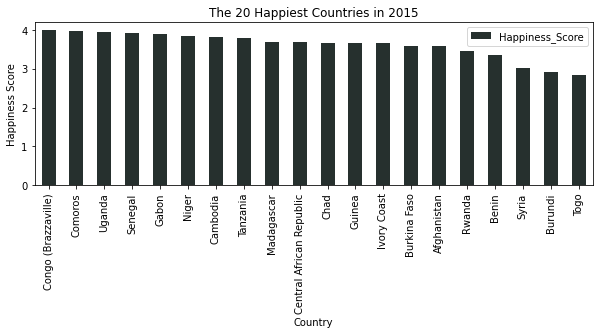

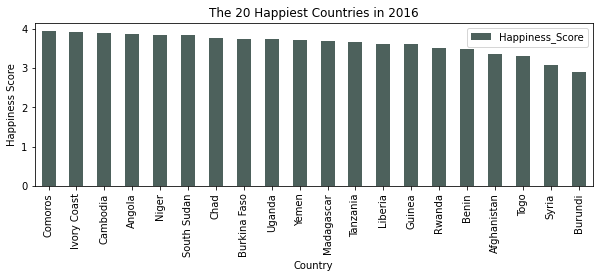

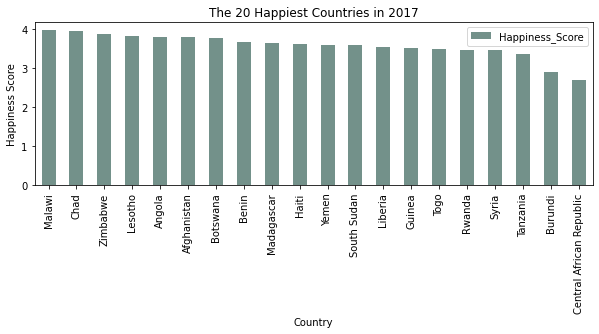

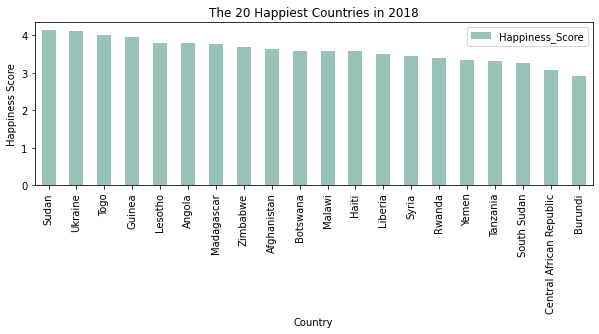

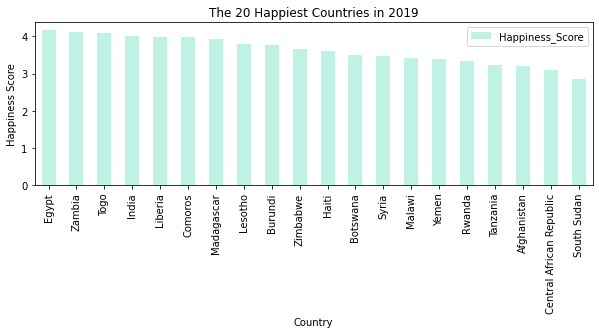

In [37]:
# Countires with 20 least Happiness_Score index

for i in range(5):
    aux_df = Happiness_df[Happiness_df.Year == 2015+i].nsmallest(20,'Happiness_Score').sort_values(by=
    ['Happiness_Score'],ascending=False)
    aux_df.plot.bar('Country','Happiness_Score',figsize=(10,3),title='The 20 Happiest Countries in 201{}'
                    .format(5+i),color=((i+1)*0.15,(i+1)*0.19,(i+1)*0.18))
    plt.ylabel('Happiness Score')

### Exploring More Details about Scandinavian Countries as Happiest Place in the World

In [23]:
# We focus on the 4 happiest countries in the world.

Scandinavian = ['Finland','Denmark','Norway','Iceland']

In [24]:
# Extrating a new dataframe for Scandinavian countries

Scandinavian_df = Happiness_df[Happiness_df.Country.isin(Scandinavian)]

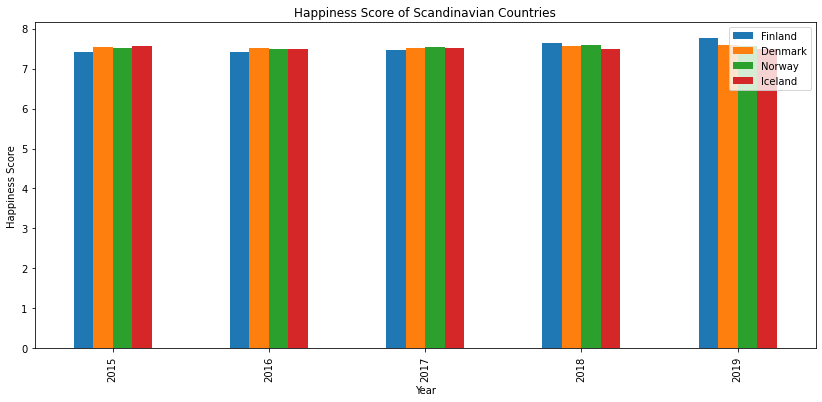

In [25]:
# Comparing Happiness Score in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].Happiness_Score.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('Happiness Score of Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

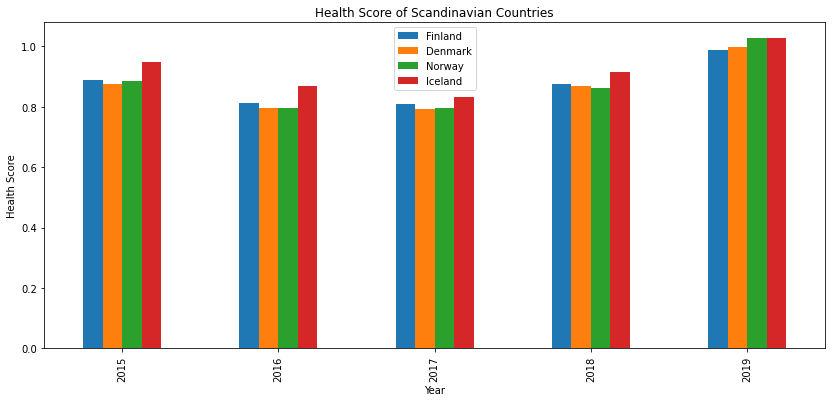

In [26]:
# Comparing Health Score in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].Health.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('Health Score of Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('Health Score')
plt.show()

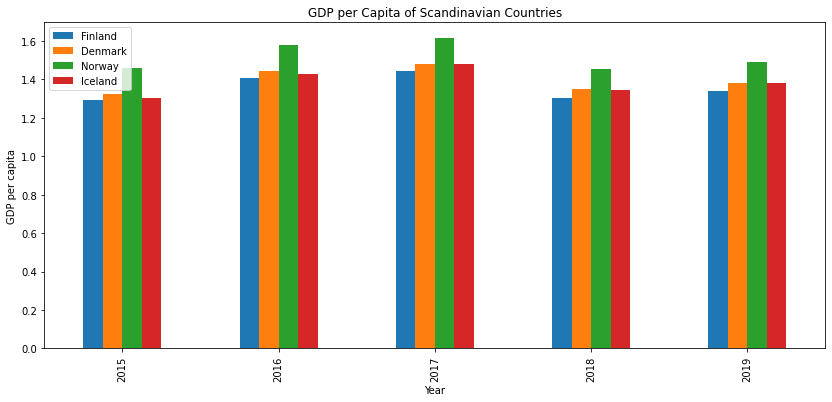

In [27]:
# Comparing GDP per capita in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].GDP_per_capita.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('GDP per Capita of Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

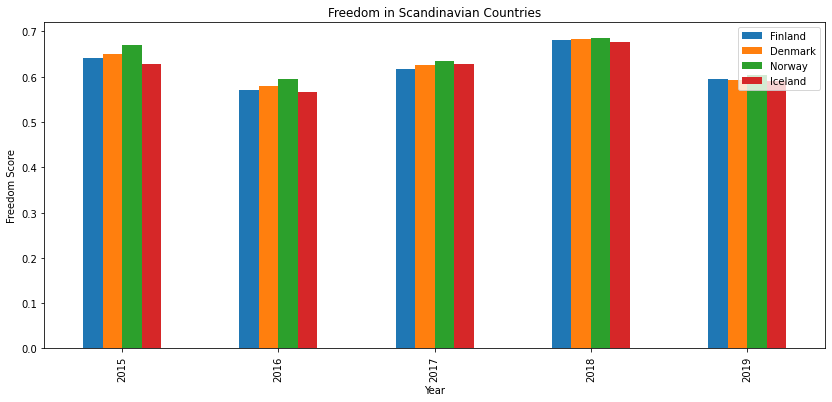

In [28]:
# Comparing Freedom Score in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].Freedom.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('Freedom in Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('Freedom Score')
plt.show()

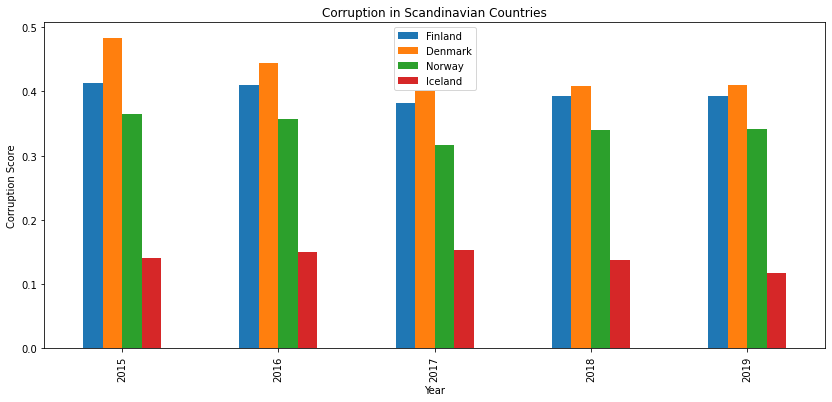

In [29]:
# Comparing corruption in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].Corruption.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('Corruption in Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('Corruption Score')
plt.show()

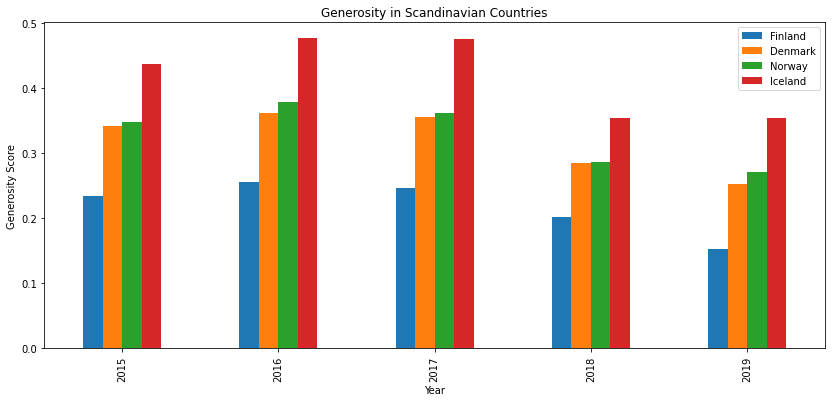

In [30]:
# Comparing generosity in Scandinavian countries (2015-2019)

d={'Year': [2015+i for i in range(5)]}
for country in Scandinavian:
    d[country]=Scandinavian_df[Scandinavian_df.Country == country].Generosity.tolist()
    
New_df = pd.DataFrame(d)

New_df.plot.bar('Year',y=[country for country in Scandinavian],figsize=(14,6))
plt.title('Generosity in Scandinavian Countries')
plt.xlabel('Year')
plt.ylabel('Generosity Score')
plt.show()